# 12 - Testy statystyczne

Testowanie hipotez to formalny sposób sprawdzania, czy zebrane dane dostarczają wystarczających dowodów przeciwko jakiejś hipotezie o populacji. Poniżej znajdują się podstawy i zasady, które warto znać przed przeprowadzeniem testów statystycznych.

### Idea i podstawowe definicje
- Hipoteza zerowa (H0): założenie, które testujemy (np. "średnia = μ0").
- Hipoteza alternatywna (H1): twierdzenie konkurencyjne (np. "średnia ≠ μ0" lub jednostronne).
- Test statystyczny: procedura, która na podstawie danych oblicza statystykę testową i decyduje, czy odrzucić H0.

### Poziom istotności i p-value
- Poziom istotności α: maksymalne dopuszczalne prawdopodobieństwo popełnienia błędu typu I (fałszywe odrzucenie H0). Najczęściej α = 0.05.
- p-value: prawdopodobieństwo otrzymania obserwowanej (lub bardziej ekstremalnej) wartości statystyki testowej zakładając, że H0 jest prawdziwa. Jeśli p-value ≤ α, odrzucamy H0.

### Błędy w testowaniu — tabela

| Błąd / pojęcie | Symbol | Co to znaczy | Praktyczne skutki | Jak zmniejszyć ryzyko / uwagi | Przykład |
|---|---:|---|---|---|---|
| Błąd typu I (fałszywe pozytywne) | α | Odrzucenie H0 gdy H0 jest prawdziwe | Fałszywe odkrycie, publikacja nieistniejącego efektu | Ustalić α (np. 0.05), korekty przy wielokrotnych testach, prerejestracja | α=0.05 → 5% szans na FP |
| Błąd typu II (fałszywe negatywne) | β | Nieodrzucenie H0 gdy H1 jest prawdziwe | Utrata szansy wykrycia rzeczywistego efektu | Zwiększyć n, zmniejszyć σ (dokładniejsze pomiary), rozważyć jednostronny test gdy uzasadniony, zwiększyć α (jeśli akceptowalne) | Mały efekt d≈0.33, n=25 → β wysoki (przykładowo ≈0.62) |
| Moc testu | 1 − β | Prawdopodobieństwo poprawnego odrzucenia H0, gdy H1 prawdziwe | Wyższa moc → większa szansa wykrycia efektu | Planowanie próby (dobór n wg oczekiwanego effect size i docelowej mocy, np. 0.8) | Cel: power ≈ 0.8 |
| Poziom istotności | α | Maksymalna dopuszczalna częstość błędów typu I | Wybór α wpływa na kompromis FP vs FN | Wybór kontekstowy (np. 0.01 w medycynie), raportuj wraz z mocą i efektami | W badaniach klinicznych często α=0.01–0.05 |
| Istotność statystyczna ≠ praktyczna | — | Wynik może być statystycznie istotny, ale bez znaczenia praktycznego | Błędne wnioski o użyteczności efektu | Zawsze raportuj efekt (np. Cohen's d) i przedziały ufności; oceniaj kontekst | p<0.05, ale d≈0.05 → efekt trywialny |
| Błąd wielokrotnych porównań | — | Rosnące ryzyko FP przy wielu testach | Więcej fałszywych odkryć w zbiorze analiz | Użyć korekt (Bonferroni, FDR), planować hipotezy zamiast eksploracji masowej | Tests: 20 porównań przy α=0.05 → większe szanse FP |
| Nierealistyczne założenia testu | — | Np. brak normalności, heteroskedastyczność, zależność obserwacji | Zafałszowane p‑value i wnioski | Sprawdzać założenia, stosować testy nieparametryczne lub bootstrap | Mała próbka + silna skośność → t-test może dawać błędne p |

<br>
<center>
<img alt="Błędy w testowaniu" src="img/bledy.jpg">
</center>


### Statystyka testowa i rozkłady
- Statystyka testowa zależy od testu: np. z-test, t-test, chi-kwadrat, F.
- Przykład (test średniej, znane σ):
  $$z = \frac{\overline{x} - \mu_0}{\sigma/\sqrt{n}}$$
  gdzie $\overline{x}$ to średnia próby, $\mu_0$ wartość z H0, $\sigma$ odchylenie populacji, $n$ rozmiar próby.
- Jeśli σ jest nieznane i próbka ma rozkład zbliżony do normalnego, używa się testu t (rozkład t-Studenta).

### Test jednostronny vs dwustronny
- Dwustronny: sprawdzamy, czy parametr różni się od wartości w H0 (kierunek nieokreślony).
- Jednostronny: sprawdzamy różnicę w konkretnym kierunku (np. > lub <). Wybór wpływa na interpretację p-value i krytyczne obszary.

### Wybór testu i założenia
- Wybieramy test zależnie od rodzaju danych (ciągłe, kategoryczne), wielkości próby i znanej/nieznanej wariancji.
- Sprawdź założenia: normalność (dla testów parametrycznych), jednorodność wariancji, niezależność obserwacji. Jeżeli założenia nie są spełnione — rozważ testy nieparametryczne.

### Wielkość efektu i rozmiar próby
- Wielkość efektu (effect size) mówi, jak duży jest obserwowany efekt — ważna przy interpretacji (statystycznie istotne ≠ praktycznie istotne).
- Planowanie rozmiaru próby: dobór n, aby uzyskać zadany poziom mocy dla oczekiwanej wielkości efektu przy danym α.

### Praktyczne wskazówki
- Zanim wykonasz test, sformułuj H0 i H1 jasno i określ α.
- Sprawdź rozkład danych i wrażliwość testu na naruszenie założeń.
- Raportuj nie tylko p-value, ale też estymatę efektu i przedział ufności.
- Interpretuj wyniki w kontekście problemu — nie polegaj wyłącznie na progu 0.05.

---

## Przykład: moc testu dla testu jednej średniej (analiza krok po kroku)
Pokażemy, jak policzyć moc testu dla testu jednej średniej na przykładzie testu z (zakładając znane σ). Najpierw rozważamy test dwustronny:

- H0: μ = μ0
- H1: μ ≠ μ0

Statystyka dla średniej próby ma rozkład normalny (jeśli próbka pochodzi z populacji normalnej lub n duże):
$$\overline{X} \sim N\left(\mu, \; \frac{\sigma^2}{n}\right).$$
Krytyczne wartości dla testu dwustronnego (poziom α) to:
$$z_{1-\alpha/2} = z_{\alpha/2,\;\text{quantile}}$$
Na skali średnich krytyczne progi to:
$$\overline{x}_{crit}^{\pm} = \mu_0 \pm z_{1-\alpha/2} \frac{\sigma}{\sqrt{n}}.$$

Pod alternatywą, gdy rzeczywista średnia to μ1, rozkład średniej ma środek przesunięty do μ1. Interesuje nas prawdopodobieństwo, że ta rozkładność leży poza obszarem akceptacji H0 (czyli odrzucimy H0): to jest moc testu.

Wprowadźmy efekt standaryzowany (Cohens d):

$$d = \frac{\mu_1 - \mu_0}{\sigma}$$

Jest to różnica między hipotetycznymi średnimi wyrażona w odchyleniach standardowych populacji. Przydatne, bo jest bezwymiarowe i ułatwia planowanie próby.

Jeśli przeskalujemy statystykę do z, pod H1 mamy przesunięcie o
$$\Delta = d\sqrt{n}.$$
Dla testu dwustronnego moc (analitycznie) liczymy jako:
$$\text{power} = P\left(Z < -z_{1-\alpha/2} - \Delta\right) + P\left(Z > z_{1-\alpha/2} - \Delta\right),$$
gdzie Z ~ N(0,1) w odniesieniu do standardowego przesunięcia.

Dla testu jednostronnego formuła jest prostsza (używamy z_{1-α} jako krytyka) i moc:
$$\text{power}_{\text{1-sided}} = P\left(Z > z_{1-\alpha} - \Delta\right).$$

Poniżej pokażemy obliczenia analityczne, stworzymy wykres rozkładów średniej pod H0 i H1, a także zweryfikujemy wynik symulacją w Pythonie.

*Interpretacja efektu standaryzowanego*: jeśli d = 0.2 — mały efekt; d = 0.5 — umiarkowany; d = 0.8 — duży (konwencje Cohena). Jednak kontekst praktyczny decyduje, czy efekt jest istotny.

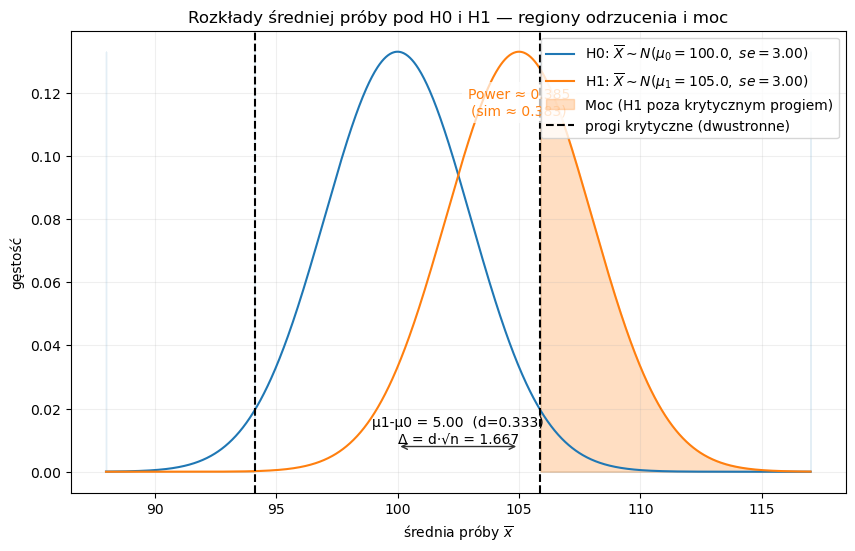

Parametry: mu0=100.0, mu1=105.0, sigma=15.0, n=25, alpha=0.05
Efekt standaryzowany d = (mu1-mu0)/sigma = 0.333
Przesunięcie Delta = d * sqrt(n) = 1.667
Krytyczne progi średniej: 94.120  i  105.880
Moc (analityczna) = 0.3848
Moc (symulacja, 200000 prób) = 0.3834

Szybka tabela mocy dla różnych n (przy tej samej wielkości efektu):
 n= 10 -> power ~ 0.184
 n= 25 -> power ~ 0.385
 n= 50 -> power ~ 0.654
 n=100 -> power ~ 0.915
 n=200 -> power ~ 0.997


In [17]:
# Kod: wykres, obliczenie mocy analitycznie i symulacja (z adnotacjami mocy)

# Parametry przykładu
mu0 = 100.0      # wartość w H0
mu1 = 105.0      # rzeczywista wartość (pod H1)
sigma = 15.0     # znane odchylenie populacji
n = 25           # rozmiar próby
alpha = 0.05     # poziom istotności (dwustronny)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Obliczenia pomocnicze
se = sigma / np.sqrt(n)                 # błąd standardowy średniej
zcrit = norm.ppf(1 - alpha/2)           # krytyczna wartość z dla testu dwustronnego

# progi na skali średnich
x_crit_low = mu0 - zcrit * se
x_crit_high = mu0 + zcrit * se

# efekt standaryzowany i przesunięcie w jednostkach z
d = (mu1 - mu0) / sigma
Delta = d * np.sqrt(n)

# moc analityczna (dwustronna)
power_analytic = norm.cdf(-zcrit - Delta) + (1 - norm.cdf(zcrit - Delta))

# symulacja Monte Carlo do weryfikacji
rng = np.random.default_rng(2025)
trials = 200_000
xbar_samples = rng.normal(loc=mu1, scale=se, size=trials)
rejects = np.logical_or(xbar_samples < x_crit_low, xbar_samples > x_crit_high)
power_sim = rejects.mean()

# Wykres rozkładów średniej pod H0 i H1
x = np.linspace(mu0 - 4*se, mu1 + 4*se, 1000)
pdf_h0 = norm.pdf(x, loc=mu0, scale=se)
pdf_h1 = norm.pdf(x, loc=mu1, scale=se)

plt.figure(figsize=(10,6))
plt.plot(x, pdf_h0, label=f'H0: $\overline{{X}}\sim N(\mu_0={mu0},\; se={se:.2f})$', color='C0')
plt.plot(x, pdf_h1, label=f'H1: $\overline{{X}}\sim N(\mu_1={mu1},\; se={se:.2f})$', color='C1')

# obszary odrzucenia (pod H0) - zaznaczone jasnoniebieskim
plt.fill_betweenx(pdf_h0, x_crit_high, x.max(), color='C0', alpha=0.12)
plt.fill_betweenx(pdf_h0, x.min(), x_crit_low, color='C0', alpha=0.12)

# obszar mocy: część rozkładu H1 leżąca poza progami krytycznymi
power_region_right = x > x_crit_high
power_region_left = x < x_crit_low
plt.fill_between(x, pdf_h1, where=power_region_right, color='C1', alpha=0.25, label='Moc (H1 poza krytycznym progiem)')
plt.fill_between(x, pdf_h1, where=power_region_left, color='C1', alpha=0.15)

# krytyczne progi
plt.axvline(x_crit_low, color='k', linestyle='--', label='progi krytyczne (dwustronne)')
plt.axvline(x_crit_high, color='k', linestyle='--')

# adnotacja mocy na wykresie
y_annot = max(max(pdf_h0), max(pdf_h1)) * 0.85
plt.text(mu1, y_annot, f'Power ≈ {power_analytic:.3f}\n(sim ≈ {power_sim:.3f})', color='C1', ha='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# zaznaczenie Δ i d na osi
arrow_y = max(pdf_h0) * 0.06
plt.annotate('', xy=(mu1, arrow_y), xytext=(mu0, arrow_y), arrowprops=dict(arrowstyle='<->', color='0.2'))
mid = (mu0 + mu1)/2
plt.text(mid, arrow_y*1.15, f'μ1-μ0 = {mu1-mu0:.2f}  (d={d:.3f})\nΔ = d·√n = {Delta:.3f}', ha='center')

plt.xlabel('średnia próby $\overline{x}$')
plt.ylabel('gęstość')
plt.title('Rozkłady średniej próby pod H0 i H1 — regiony odrzucenia i moc')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

# Wyniki wypisane tekstowo
print(f"Parametry: mu0={mu0}, mu1={mu1}, sigma={sigma}, n={n}, alpha={alpha}")
print(f"Efekt standaryzowany d = (mu1-mu0)/sigma = {d:.3f}")
print(f"Przesunięcie Delta = d * sqrt(n) = {Delta:.3f}")
print(f"Krytyczne progi średniej: {x_crit_low:.3f}  i  {x_crit_high:.3f}")
print(f"Moc (analityczna) = {power_analytic:.4f}")
print(f"Moc (symulacja, {trials} prób) = {power_sim:.4f}")

# Tabela mocy dla różnych n
ns = np.array([10, 25, 50, 100, 200])
powers = []
for nn in ns:
    Delta_n = d*np.sqrt(nn)
    zcrit_n = norm.ppf(1-alpha/2)
    power_n = norm.cdf(-zcrit_n - Delta_n) + (1 - norm.cdf(zcrit_n - Delta_n))
    powers.append(power_n)

print('\nSzybka tabela mocy dla różnych n (przy tej samej wielkości efektu):')
for nn, pw in zip(ns, powers):
    print(f' n={nn:3d} -> power ~ {pw:.3f}')


## Wyjaśnienie elementów wykresu i interpretacja (szczegółowo)

1) Dlaczego widzimy dwie krzywe?
- Niebieska krzywa (H0) to rozkład średniej próby zakładając, że hipoteza zerowa jest prawdziwa (μ = μ0). Pod H0 definiujemy progi krytyczne tak, by ich łączna masa wynosiła α.
- Pomarańczowa krzywa (H1) to rozkład średniej próby, gdy prawdziwa jest alternatywa (μ = μ1). To pod tą krzywą liczymy prawdopodobieństwo trafienia w obszar odrzucenia H0 — czyli moc testu.

2) Co oznacza zacieniony obszar pod H1?
- Zacieniony fragment pomarańczowej krzywej to tzw. power area: część rozkładu H1, która leży w regionie odrzucenia wyznaczonym przez H0. Liczbowo jest to P(odrzucamy H0 | H1 prawdziwe) = moc testu.
- W naszym przykładzie moc ≈ 0.38 (wartość analityczna), co potwierdza symulacja — oznacza to, że przy tych parametrach tylko ~38% eksperymentów prawidłowo odrzuci H0.

3) Co pokazuje strzałka między μ0 i μ1?
- Strzałka ilustruje różnicę w oryginalnych jednostkach: μ1 − μ0. Dla planowania testu wygodniej użyć efektu standaryzowanego:
  - d = (μ1 − μ0) / σ — bezwymiarowa wielkość efektu (Cohena),
  - Δ = d·√n — przesunięcie rozkładu H1 w skali statystyki Z. Im większe Δ, tym większa moc.

4) Dwustronny vs jednostronny
- Dwustronny: α jest dzielone na oba ogony rozkładu H0 — progi krytyczne po obu stronach.
- Jednostronny: całe α jest po jednej stronie; próg krytyczny jest wtedy bliżej środka i często daje większą moc, jeśli kierunek efektu jest poprawnie założony.

5) Praktyczna interpretacja (nasz przykład)
- Moc ≈ 0.38 oznacza wysokie ryzyko błędu II (β ≈ 0.62): w większości powtórzeń nie wykryjemy efektu μ1 = 105 przy n = 25 i σ = 15.
- Sposoby zwiększenia mocy: zwiększyć n, zmniejszyć σ (dokładniejsze pomiary), przyjąć test jednostronny gdy uzasadniony, lub zwiększyć α (kosztem większego ryzyka typu I).

6) Co warto raportować
- Podaj: estymatę efektu (d), se (σ/√n), krytyczne progi, moc (analityczna i symulacyjna), p‑value oraz przedziały ufności dla średniej.
- Zawsze omów znaczenie praktyczne efektu (np. czy d ≈ 0.33 ma realne znaczenie w danym kontekście).

Krótka uwaga: wartości analityczne opierają się na założeniu normalności i znanego σ — symulacja Monte‑Carlo jest prostym sposobem weryfikacji wyników empirycznie.


## Komentarze i objaśnienia (interpretacja wyników)

Poniżej krótkie, konkretne wyjaśnienia dotyczące wyników wygenerowanych przez powyższy przykład (parametry: μ0=100, μ1=105, σ=15, n=25, α=0.05).

- Najważniejsze wartości (z obliczeń):
  - błąd standardowy średniej: $\mathrm{se}=\sigma/\sqrt{n}=15/\sqrt{25}=3$;
  - efekt standaryzowany: $d=(\mu_1-\mu_0)/\sigma=(105-100)/15\approx 0.333$ (mały–umiarkowany efekt);
  - przesunięcie w skali $Z$: $\Delta=d\sqrt{n}\approx 0.333\times5=1.667$;
  - progi krytyczne (dwustronne, α=0.05): $\overline{x}_{crit}\approx 100\pm 1.96\times3\Rightarrow [94.12,\;105.88]$.

- Dlaczego moc jest ~0.38?
  - Moc to prawdopodobieństwo, że pod prawdziwą średnią μ1 obserwowany wynik wypadnie poza obszar akceptacji H0. Ponieważ μ1=105 leży bardzo blisko górnego progu (105.88), tylko część rozkładu pod H1 przekracza ten próg. Stąd stosunkowo niska moc (~38%).
  - W praktyce oznacza to wysokie ryzyko błędu typu II (β≈0.62): nawet jeśli prawdziwa różnica wynosi 5 jednostek, mamy dużą szansę jej nie wykryć przy n=25.

- Analiza wykresu:
  - Niebieska krzywa: rozkład średniej pod H0 (środek 100, se=3).
  - Pomarańczowa krzywa: rozkład średniej pod H1 (środek 105, se=3).
  - Ciemniejsze obszary na końcach pokazują regiony odrzucenia H0 (pod H0 mają łącznie prawdopodobieństwo α).
  - Pole pod krzywą H1 ponad krytycznym progiem to część, która daje moc (prawej strony w tym przykładzie).

- Analityczne vs symulacja:
  - Formuła analityczna używa rozkładu normalnego dla przeskalowanej statystyki i daje dokładny wynik przy założeniu normalności i znanego σ.
  - Symulacja Monte‑Carlo (generowanie wielu średnich z N(μ1,se)) weryfikuje tę wartość empirycznie i powinna dać bardzo zbliżony wynik (różnice losowe maleją przy dużej liczbie prób).

- Co można zmienić, aby zwiększyć moc:
  1. Zwiększyć n (najczęściej najprostsze i najskuteczniejsze). Dla d≈0.33, aby uzyskać moc ≈0.8 potrzeba ~70–75 obserwacji.
  2. Zmniejszyć σ (dokładniejsze pomiary, bardziej jednorodna próba).
  3. Użyć testu jednostronnego, gdy kierunek jest uzasadniony (zwiększa moc kosztem braku możliwości wykrycia efektu w przeciwnym kierunku).
  4. Podnieść α (np. do 0.1) — zwiększa moc, ale pogarsza kontrolę błędu typu I.

- Gotowe funkcje Pythona i biblioteki (zalecane):
  - statsmodels.stats.power.TTestPower — moc i wymagany rozmiar próby dla testów jednopróbkowych / parowanych (metody: solve_power(effect_size, nobs, alpha, power, alternative)).
  - statsmodels.stats.power.TTestIndPower — test dwóch niezależnych prób.
  - statsmodels.stats.power.NormalIndPower — użyteczna przy z‑testach / porównaniach proporcji.
  - statsmodels.stats.proportion.proportion_effectsize — do konwersji różnicy proporcji do efektu standaryzowanego.

Przykłady użycia (skrót):

```python
from statsmodels.stats.power import TTestPower
# obliczenie mocy przy d=0.333, n=25, alpha=0.05 (dwustronny)
power = TTestPower().solve_power(effect_size=0.333, nobs=25, alpha=0.05, alternative='two-sided')

# wymagane n dla d i docelowej mocy
n_req = TTestPower().solve_power(effect_size=0.333, power=0.8, alpha=0.05, alternative='two-sided')
```

- Krótkie zalecenie do raportu wyników:
  - Podaj estymatę efektu (d), se, wartości krytyczne, moc (analityczna i ew. symulacyjna), p-value i przedziały ufności.
  - Omów znaczenie praktyczne efektu (czy d≈0.33 ma sens w Twoim kontekście) oraz ograniczenia badania (n, założenia normalności, znane/nieznane σ).

## Zadanie 1. 1-średnia

*Czy przeciętna liczba kroków dziennie użytkowników smartwatchy przekracza zalecane 10 000?*

Z pliku dailyActivity_merged.csv dostępnego w zbiorze Fitbit Fitness Tracker Data wczytaj dane do Pythona i sprawdź, czy przeciętna liczba kroków dziennie (TotalSteps) wśród badanych użytkowników przekracza 10 000 kroków.

Zaimportuj dane i wyświetl podstawowe informacje (liczba obserwacji, zmienne).

Utwórz próbkę z kolumny TotalSteps, usuń wartości brakujące.

Sformułuj hipotezy:

H0: μ = 10000

H1: μ>10000


In [ ]:
import pandas as pd
from scipy import stats
df = pd.read_csv("data/dailyActivity_merged.csv")
steps = df['TotalSteps'].dropna()

In [23]:
# rozwiązanie w pliku solution12.py

## Zadanie 2. 1-proporcja

**Czy ≥ 60% programistów używa narzędzi AI (np. Copilot/ChatGPT) co najmniej raz w tygodniu?**

Źródło danych: Stack Overflow Developer Survey (np. 2023/2024, Kaggle/GitHub).

Plik: survey_results_public.csv (nazwa bywa identyczna w latach).
Kolumna z częstotliwością AI bywa opisana jako coś w stylu:
AI_Usage / AIFrequency / AIToolsFrequency (z wartościami „Daily”, „Weekly”, „Monthly”, …).

Twoim zadaniem jest dopasować właściwą kolumnę w danym roku.

Wczytaj dane i sprawdź nazwy kolumn (żeby odnaleźć tę dot. AI):

Zbuduj zmienną zero-jedynkową: 1 = używa AI codziennie lub co najmniej raz w tygodniu; 0 = rzadziej.

Przetestuj hipotezę jednostronną:
H0: p = 0.60

H1: p > 0.60
 
Podaj oszacowanie proporcji, statystykę testu, p-value, efekt standaryzowany Cohen’s h oraz moc testu.

Zinterpretuj wyniki w kontekście pytania.

In [19]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest, proportion_confint, proportion_effectsize
from statsmodels.stats.power import NormalIndPower

import kagglehub

# https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2023-developers-survey

path = kagglehub.dataset_download("stackoverflow/stack-overflow-2023-developers-survey")

import os

for file in os.listdir(path):
    print(file)

survey_results_public.csv
survey_results_schema.csv
so_survey_2023.pdf
README_2023.txt


In [14]:
df = pd.read_csv(f"{path}/survey_results_public.csv")
print(df.shape)
print(df.columns[:20])

(89184, 84)
Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency'],
      dtype='object')


W 2023 wersji kolumna z pytaniem o AI to:

> AI_Select (z wartościami m.in. "Yes, I use AI tools regularly", "No, but I plan to soon", "No, and I don't plan to")

In [15]:
# Pokaż kolumny zawierające "AI" lub "artificial"
[x for x in df.columns if "AI" in x or "artificial" in x.lower()]

['AISearchHaveWorkedWith',
 'AISearchWantToWorkWith',
 'AIDevHaveWorkedWith',
 'AIDevWantToWorkWith',
 'SOAI',
 'AISelect',
 'AISent',
 'AIAcc',
 'AIBen',
 'AIToolInterested in Using',
 'AIToolCurrently Using',
 'AIToolNot interested in Using',
 'AINextVery different',
 'AINextNeither different nor similar',
 'AINextSomewhat similar',
 'AINextVery similar',
 'AINextSomewhat different']

In [22]:
print(df["AISelect"].value_counts(dropna=False))

AISelect
Yes                        39042
No, and I don't plan to    26221
No, but I plan to soon     22710
NaN                         1211
Name: count, dtype: int64


Zakodujmy: 1 = korzysta z AI, 0 = nie korzysta: 

In [20]:
positive = {
    "Yes, I use AI tools regularly",
    "Yes, I use AI tools sometimes"
}

ai_use = df["AISelect"].astype(str).isin(positive).astype(int)

Obliczenia statystyczne:

In [21]:
# rozwiązanie w pliku solution13.py

## Zadanie 3. Testy normalności

Dane pochodzą z eksperymentu, w którym mierzono czas reakcji (w sekundach) 50 kierowców w teście symulatorowym po spożyciu kawy.

Chcemy sprawdzić, czy czas reakcji ma rozkład normalny — co pozwoliłoby stosować testy parametryczne w dalszej analizie.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Losowe dane (symulowane)
np.random.seed(42)
reaction_time = np.random.normal(loc=0.45, scale=0.07, size=40)   # 40 "typowych" kierowców
outliers = np.random.uniform(0.65, 0.9, 10)                       # 10 wolniejszych kierowców
reaction_time = np.concatenate([reaction_time, outliers])

df = pd.DataFrame({"Reaction_Time": reaction_time})
df.head()


,Reaction_Time
0,0.484770
1,0.440321
2,0.495338
3,0.556612
4,0.433609


### Wizualna ocena rozkładu:

- Narysuj histogram z krzywą gęstości i nanieś średnią.
- Użyj również Q–Q plotu, aby ocenić zgodność z rozkładem normalnym.

In [25]:
# twoje rozwiązanie tutaj

### Formalne testy normalności

W statystyce często zakładamy, że dane pochodzą z populacji o **rozkładzie normalnym**. 

Zanim zastosujemy testy parametryczne (np. test t, ANOVA), warto to sprawdzić za pomocą **testów normalności** — np. **testu Shapiro–Wilka** i **testu D’Agostino–Pearsona**.

---

#### Test Shapiro–Wilka

**Cel:** sprawdzenie, czy próbka pochodzi z populacji o rozkładzie normalnym.

**Hipotezy:**

$$H_0: \text{dane pochodzą z rozkładu normalnego}$$

$$H_1: \text{dane nie pochodzą z rozkładu normalnego}$$

**Statystyka testowa:**

$$W = \frac{\left(\sum_{i=1}^{n} a_i x_{(i)}\right)^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

gdzie:  
- $x_{(i)}$ – i-ta uporządkowana obserwacja (od najmniejszej do największej),  
- $a_i$ – współczynniki zależne od oczekiwanych wartości i kowariancji statystyk porządkowych w rozkładzie normalnym,  
- $\bar{x}$– średnia z próby.

**Interpretacja:**  
Jeśli wartość *p* < α (np. 0.05), odrzucamy $ H_0$.  
Oznacza to, że dane **nie mają rozkładu normalnego**.  
Test Shapiro–Wilka jest **bardzo czuły** przy małych próbach (n < 5000).

---

#### Test D’Agostino–Pearsona (normaltest)

**Cel:** ocena normalności poprzez analizę **skośności (skewness)** i **kurtozy (kurtosis)** danych.

**Idea:**
- dla danych normalnych: skośność ≈ 0, kurtoza ≈ 3,  
- duże odchylenia od tych wartości wskazują na nienormalność.

**Statystyka testowa:**

$$K^2 = Z_{skew}^2 + Z_{kurt}^2$$

gdzie:
- $ Z_{skew}$ i $Z_{kurt}$ to standaryzowane wartości skośności i kurtozy.

Pod $H_0$, $K^2$ ma przybliżony rozkład chi-kwadrat z 2 stopniami swobody.

**Hipotezy:**

$$H_0: \text{dane mają rozkład normalny}$$
$$H_1: \text{dane nie mają rozkładu normalnego}$$

**Interpretacja:**  
Jeśli *p* < α, odrzucamy \( H_0 \) — dane nie są normalne.  
Test D’Agostino–Pearsona działa dobrze przy **średnich i dużych próbach (n ≥ 20)**.

---

### Porównanie testów

| Cecha | Test Shapiro–Wilka | Test D’Agostino–Pearsona |
|:------|:-------------------|:--------------------------|
| Zakres zastosowania | Małe i średnie próby | Średnie i duże próby |
| Oparty na | Statystykach porządkowych | Skośności i kurtozie |
| Rozkład testowy | Empiryczny | Chi-kwadrat (df = 2) |
| Implementacja w Pythonie | `stats.shapiro()` | `stats.normaltest()` |

---

**Wskazówka:**  
W praktyce warto łączyć **analizę graficzną (histogram, Q–Q plot)** z testami formalnymi, aby uzyskać pełniejszy obraz rozkładu danych.


In [ ]:
# twoje rozwiązanie tutaj